In [1]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

STUD_PATH = '/mnt/workspace_stud/'
DATA_PATH = f'{STUD_PATH}mbentse/'
OUTPUT_PATH = f'{STUD_PATH}stud2/output/'

In [2]:
INPUT_PATH = f'{DATA_PATH}catlas_objects/liver_sample_9.h5ad'
TISSUE = INPUT_PATH.split('/')[-1].replace('.h5ad', '')
TSV_OUT = f"{OUTPUT_PATH}clusters_{TISSUE}.tsv"

In [3]:
adata = ad.read(INPUT_PATH)
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
epi.pp.filter_features(adata, min_counts=1)
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features'
    var: 'n_cells', 'n_counts'

In [4]:
#epi.pp.binarize(adata)
#adata.layers['binary'] = adata.X.copy()

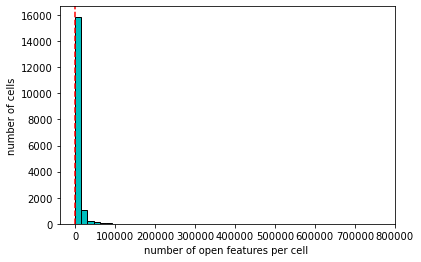

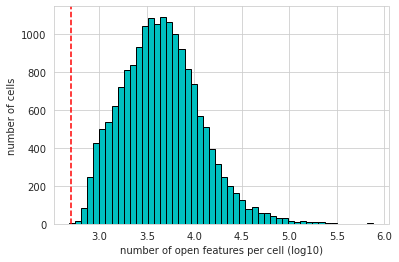

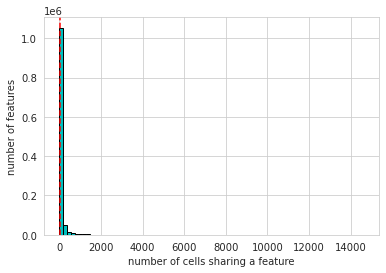

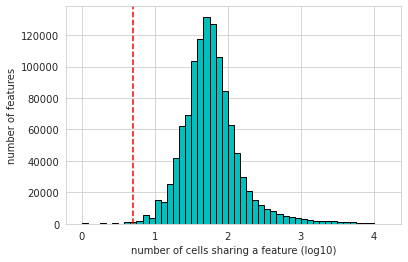

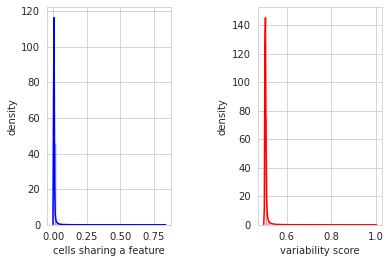

In [5]:
min_features = 500

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features)

min_cells = 5

epi.pp.coverage_features(adata, binary=True, log=False, bins=50,
               threshold=min_cells)
epi.pp.coverage_features(adata, binary=True, log=10, bins=50,
               threshold=min_cells)

epi.pp.cal_var(adata)

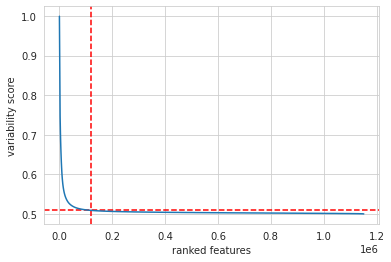

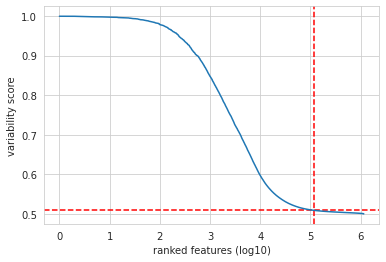

In [6]:
min_score_value = 0.51
nb_feature_selected = 120000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected)

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected)

In [7]:
#adata.raw = adata

In [8]:
#adata = epi.pp.select_var_feature(adata,
#                                  nb_features=nb_feature_selected,
#                                  show=False,
#                                  copy=True)

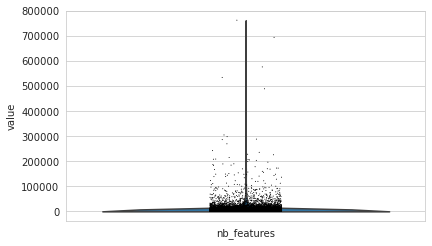

In [9]:
epi.pl.violin(adata, ['nb_features'])

In [10]:
epi.pp.filter_cells(adata, min_features=10)
epi.pp.filter_cells(adata, max_features=60000)

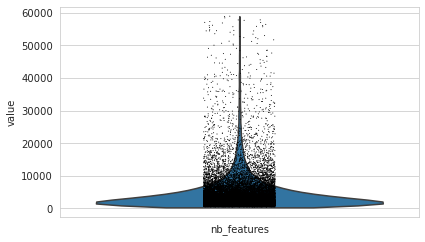

In [11]:
epi.pl.violin(adata, ['nb_features'])

In [12]:
epi.pp.normalize_total(adata)
adata.layers['normalised'] = adata.X.copy()
epi.pp.log1p(adata)

In [13]:
adata.write_h5ad(f'{OUTPUT_PATH}{TISSUE}_pp17.h5ad')

In [14]:
adata

AnnData object with n_obs × n_vars = 17419 × 1151566
    obs: 'nb_features'
    var: 'n_cells', 'n_counts', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p'
    layers: 'normalised'